In [1]:
# Package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
from os import listdir
from os.path import isfile, join
from os import walk

import pydicom
from pydicom.data import get_testdata_files
from glob import glob
import joblib

# User Package

## 讀取keys

In [21]:
df_key = pd.read_csv(r'BFX_codedkeys.csv', encoding='utf-8')

In [22]:
df_key

,filename,CODED_PART,CODED_LEVEL,PART,LEVEL,BodyPartExamined,RescaleSlope,RescaleIntercept,IS_NEG,size,CODED_ID,CODED_APLY,切分,APLY_IS_UP_EXM,APLY_IS_LOW_EXM
0,BFX_000000,,,,,UP_EXM,1.0,0.0,1.0,1693x1353,6,6,test,Y,N
1,BFX_000001,,,,,UP_EXM,1.0,0.0,1.0,1693x1353,6,6,test,Y,N
2,BFX_000002,,,,,HAND,NaN,NaN,NaN,3810x2228,6,6,test,Y,N
3,BFX_000003,,,,,HAND,NaN,NaN,NaN,3306x2228,6,6,test,Y,N
4,BFX_000004,,,,,UP_EXM,1.0,0.0,1.0,2033x1693,6,6,test,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,BFX_047524,18,3,蹠骨,完全骨折,FOOT,1.0,0.0,1.0,2177x1309,46,311,train,N,Y
2976,BFX_047525,18,3,蹠骨,完全骨折,ANKLE,1.0,0.0,1.0,1989x1324,46,311,train,N,Y
2977,BFX_047526,18,3,蹠骨,完全骨折,ANKLE,1.0,0.0,1.0,1975x1203,46,311,train,N,Y
2978,BFX_047527,7,1,肋骨,龜裂,CHEST,NaN,NaN,1.0,2148x1768,89,312,train,N,N


In [23]:
df_key['size'].value_counts().to_frame()

,size
1722x1430,209
2438x2032,87
2010x1670,75
2446x2010,68
2033x1693,49
...,...
1664x1072,1
1309x753,1
2303x2929,1
1680x1072,1


In [5]:
df_key.BodyPartExamined.unique()

array(['UP_EXM', 'HAND', 'CHEST', 'LEG', 'ANKLE', 'KNEE', 'PELVIS',
       'SHOULDER', 'LSPINE', 'ABDOMEN', 'SPINE', 'FOOT', 'FEMUR',
       'UPPER EXTREMITY', 'RIB', 'HIP', 'ELBOW', 'LOW_EXM', 'SKULL',
       'Rt Hand Oblique', nan, 'ARM', 'LOWER LIMES', 'TOE',
       'PELVIS OR HIP', 'WRIST', 'UPPER LIMBS', 'CSPINE', 'EXTREMITY',
       'Lower limb dist.', 'TSPINE', 'L SPINE', 'LOWER LIMB', 'THORAX',
       'UPPER LIMB', 'FOREARM', 'TIBIA', 'COCCYX', 'LOWER EXT', 'HUMERUS',
       'LEGPROX', 'PATELLA', 'FINGER', 'NASAL BONES', 'CLAVICLE',
       'Hand (L) PA', 'Hand (L) OBL', 'Rib oblique(R)', 'Rib oblique(L)',
       'NECK', 'TLSPINE', 'Upper limb dist.', "Ribs RR't Oblique",
       'WristLAP', 'ChestErect PA', 'WristLLAT', 'FACIAL BONES'],
      dtype=object)

In [6]:
df_key[['CODED_PART', 'PART']].drop_duplicates().sort_values('CODED_PART').reset_index(drop=True)

,CODED_PART,PART
0,,
1,-1,NaN
2,0,大腿骨頸/股骨頸
3,10,肩胛骨
4,11,脛骨/腓骨
5,12,腕關節
6,13,腕骨(一手或雙手)
7,14,膝蓋骨
8,15,臂骨（肱骨內上髁、外上髁骨）
9,16,趾骨（足種子骨）


In [7]:
df_key[df_key['filename']=='BFX_000017']

,filename,CODED_PART,CODED_LEVEL,PART,LEVEL,BodyPartExamined,RescaleSlope,RescaleIntercept,IS_NEG,size,CODED_ID,CODED_APLY,切分,APLY_IS_UP_EXM,APLY_IS_LOW_EXM
17,BFX_000017,4,3,掌骨,完全骨折,SHOULDER,1.0,0.0,1.0,1918x2092,17,10,train,Y,N


In [8]:
df_key[df_key['CODED_APLY']==10]

,filename,CODED_PART,CODED_LEVEL,PART,LEVEL,BodyPartExamined,RescaleSlope,RescaleIntercept,IS_NEG,size,CODED_ID,CODED_APLY,切分,APLY_IS_UP_EXM,APLY_IS_LOW_EXM
16,BFX_000016,4,3,掌骨,完全骨折,CHEST,1.0,0.0,1.0,3408x3077,17,10,train,Y,N
17,BFX_000017,4,3,掌骨,完全骨折,SHOULDER,1.0,0.0,1.0,1918x2092,17,10,train,Y,N
18,BFX_000018,4,3,掌骨,完全骨折,SHOULDER,1.0,0.0,1.0,1893x1729,17,10,train,Y,N


In [9]:
# df_key.groupby('CODED_APLY').CODED_APLY.count().value_counts().to_frame()
df_key[df_key.groupby('CODED_APLY').CODED_APLY.transform('count') == 78]

,filename,CODED_PART,CODED_LEVEL,PART,LEVEL,BodyPartExamined,RescaleSlope,RescaleIntercept,IS_NEG,size,CODED_ID,CODED_APLY,切分,APLY_IS_UP_EXM,APLY_IS_LOW_EXM
1632,BFX_028841,6,1,橈骨/尺骨,龜裂,HAND,1.0,0.0,1.0,2032x1625,291,110,train,Y,N
1633,BFX_028842,6,1,橈骨/尺骨,龜裂,HAND,1.0,0.0,1.0,2032x1625,291,110,train,Y,N
1634,BFX_028843,6,1,橈骨/尺骨,龜裂,KNEE,1.0,0.0,1.0,2438x2032,291,110,train,Y,N
1635,BFX_028844,6,1,橈骨/尺骨,龜裂,HAND,1.0,0.0,1.0,2032x1625,291,110,train,Y,N
1636,BFX_028845,6,1,橈骨/尺骨,龜裂,KNEE,1.0,0.0,1.0,2438x2032,291,110,train,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,BFX_028914,6,1,橈骨/尺骨,龜裂,KNEE,1.0,0.0,1.0,2438x2032,291,110,train,Y,N
1706,BFX_028915,6,1,橈骨/尺骨,龜裂,ELBOW,1.0,0.0,1.0,2032x1625,291,110,train,Y,N
1707,BFX_028916,6,1,橈骨/尺骨,龜裂,ELBOW,1.0,0.0,1.0,2032x1625,291,110,train,Y,N
1708,BFX_028917,6,1,橈骨/尺骨,龜裂,EXTREMITY,1.0,0.0,1.0,3408x2235,291,110,train,Y,N


In [10]:
df_key[df_key['LEVEL'].str.contains('無')].CODED_PART.value_counts()

-1    750
Name: CODED_PART, dtype: int64

In [11]:
df_key[df_key['CODED_PART'].isin([6,7])]

,filename,CODED_PART,CODED_LEVEL,PART,LEVEL,BodyPartExamined,RescaleSlope,RescaleIntercept,IS_NEG,size,CODED_ID,CODED_APLY,切分,APLY_IS_UP_EXM,APLY_IS_LOW_EXM


## 0818討論
回報理賠案件的部位及部位的嚴重程度

* 一個光碟會有多張照片，判斷那個部位(約20幾個部位)最嚴重，並呈現其部位嚴重程度(無、龜裂、不完全骨折、骨折)

* label的部分、程式的部分

* 資料預處理 論文 標註

* ＣＮＮ的架構

## 讀取array

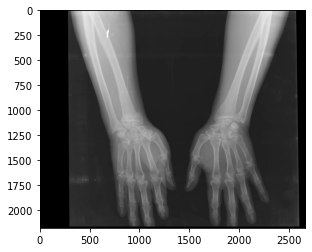

In [12]:
ar = joblib.load(r'array/train/BFX_046464.JOBLIB')
plt.imshow(ar, cmap=plt.cm.gray)
plt.show()

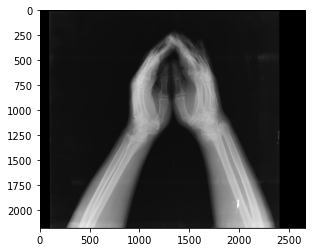

In [13]:
ar = joblib.load(r'array/train/BFX_046465.JOBLIB')
plt.imshow(ar, cmap=plt.cm.gray)
plt.show()

In [14]:
[4095] - ar

array([[4095, 4095, 4095, ..., 4095, 4095, 4095],
       [4095, 4095, 4095, ..., 4095, 4095, 4095],
       [4095, 4095, 4095, ..., 4095, 4095, 4095],
       ...,
       [4095, 4095, 4095, ..., 4095, 4095, 4095],
       [4095, 4095, 4095, ..., 4095, 4095, 4095],
       [4095, 4095, 4095, ..., 4095, 4095, 4095]])

In [15]:
ar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [16]:
# 
ar.min(), ar.max(), ar.mean(), ar.std()

(0, 4070, 742.4698177209078, 935.0770486712264)

In [17]:
# 背景白色的負片、

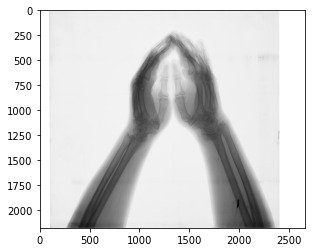

In [18]:
plt.imshow([4095] - ar, cmap=plt.cm.gray)
plt.show()

In [20]:
# 安安有人嗎，立諭到此一遊